In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
 

In [2]:
df = pd.read_csv('iphone.csv')

In [3]:
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [12]:
df.drop('Gender', axis=1, inplace=True)

Gender Category

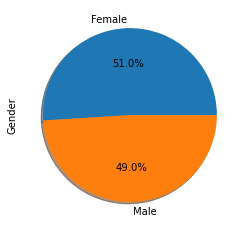

<Figure size 864x432 with 0 Axes>

In [11]:
df['Gender'].value_counts().plot(kind= 'pie', autopct='%1.1f%%',shadow=True)
plt.figure(figsize = (12,6))
plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   Salary           400 non-null    int64
 2   Purchase Iphone  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [18]:
X= df.drop('Purchase Iphone', axis=1).values
y= df['Purchase Iphone'].values

The purple dots refer to people that purchased the iphone while Yellow dots refers to people who did not purchase the Iphone

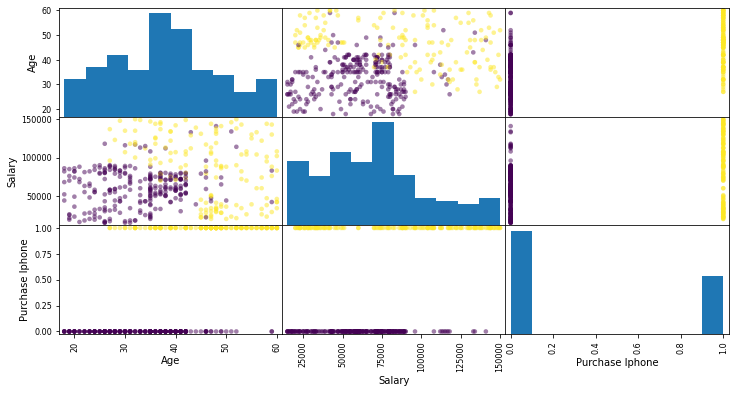

In [28]:
pd.plotting.scatter_matrix(df, c= y, figsize = [12,6], s = 85)
plt.show()

What kind of customer would purchase an iphone based on salary

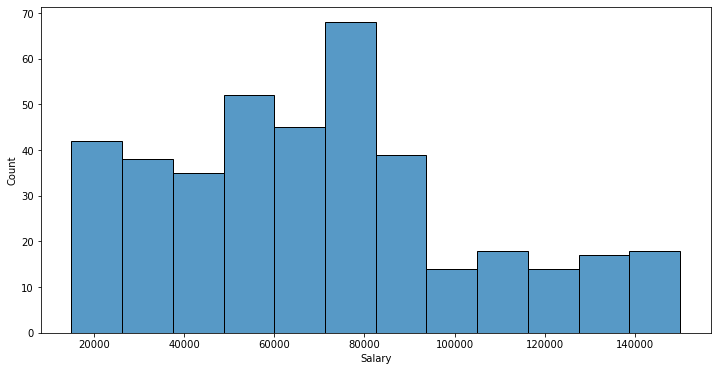

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df.Salary, kde=False)
plt.show()

customers that purchased an Iphone based on salary

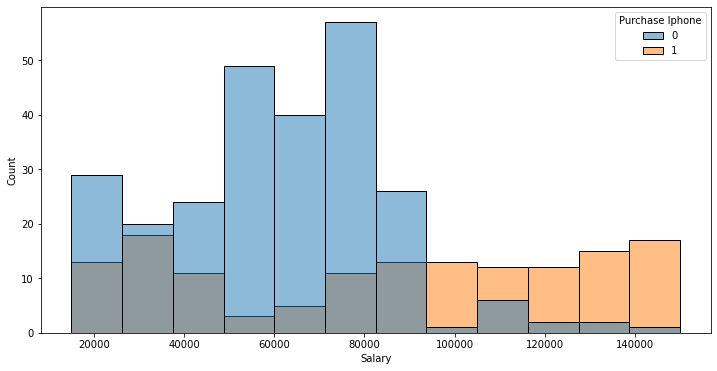

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df, x='Salary', hue='Purchase Iphone')
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

Text(0, 0.5, 'Accuracy')

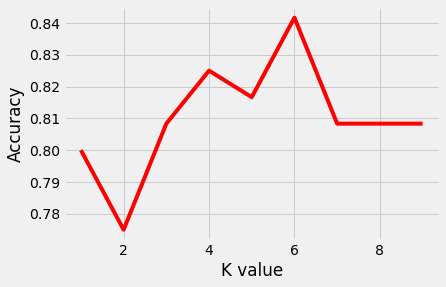

In [54]:
accuracy= []
for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
plt.style.use('fivethirtyeight')
plt.plot(range(1,10), accuracy, c ='r')
plt.xlabel('K value')
plt.ylabel('Accuracy')

    

Accuracy

In [78]:
    knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    metrics.accuracy_score(y_test, y_pred)

0.8416666666666667

In [63]:
from mlxtend.plotting import plot_decision_regions
X= df.drop('Purchase Iphone', axis=1).to_numpy()
y =df['Purchase Iphone'].to_numpy()

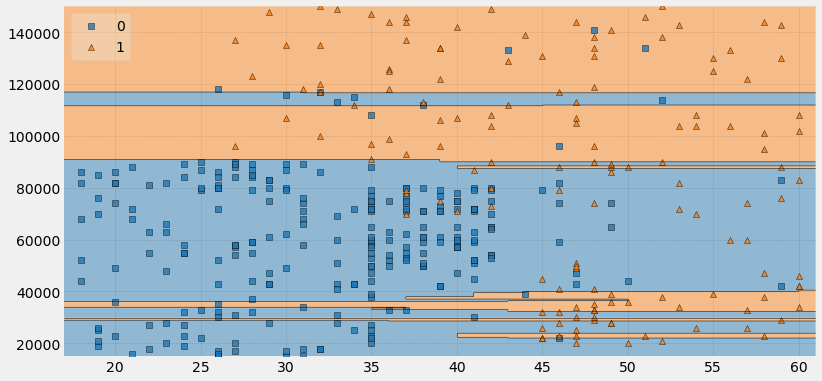

In [80]:
plt.style.use('bmh')
plt.figure(figsize=(12,6))
plot_decision_regions(X, y , clf =knn, legend=2)
plt.show()